In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9hcHBsaWNhdGlvbnM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_7995/400304049.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

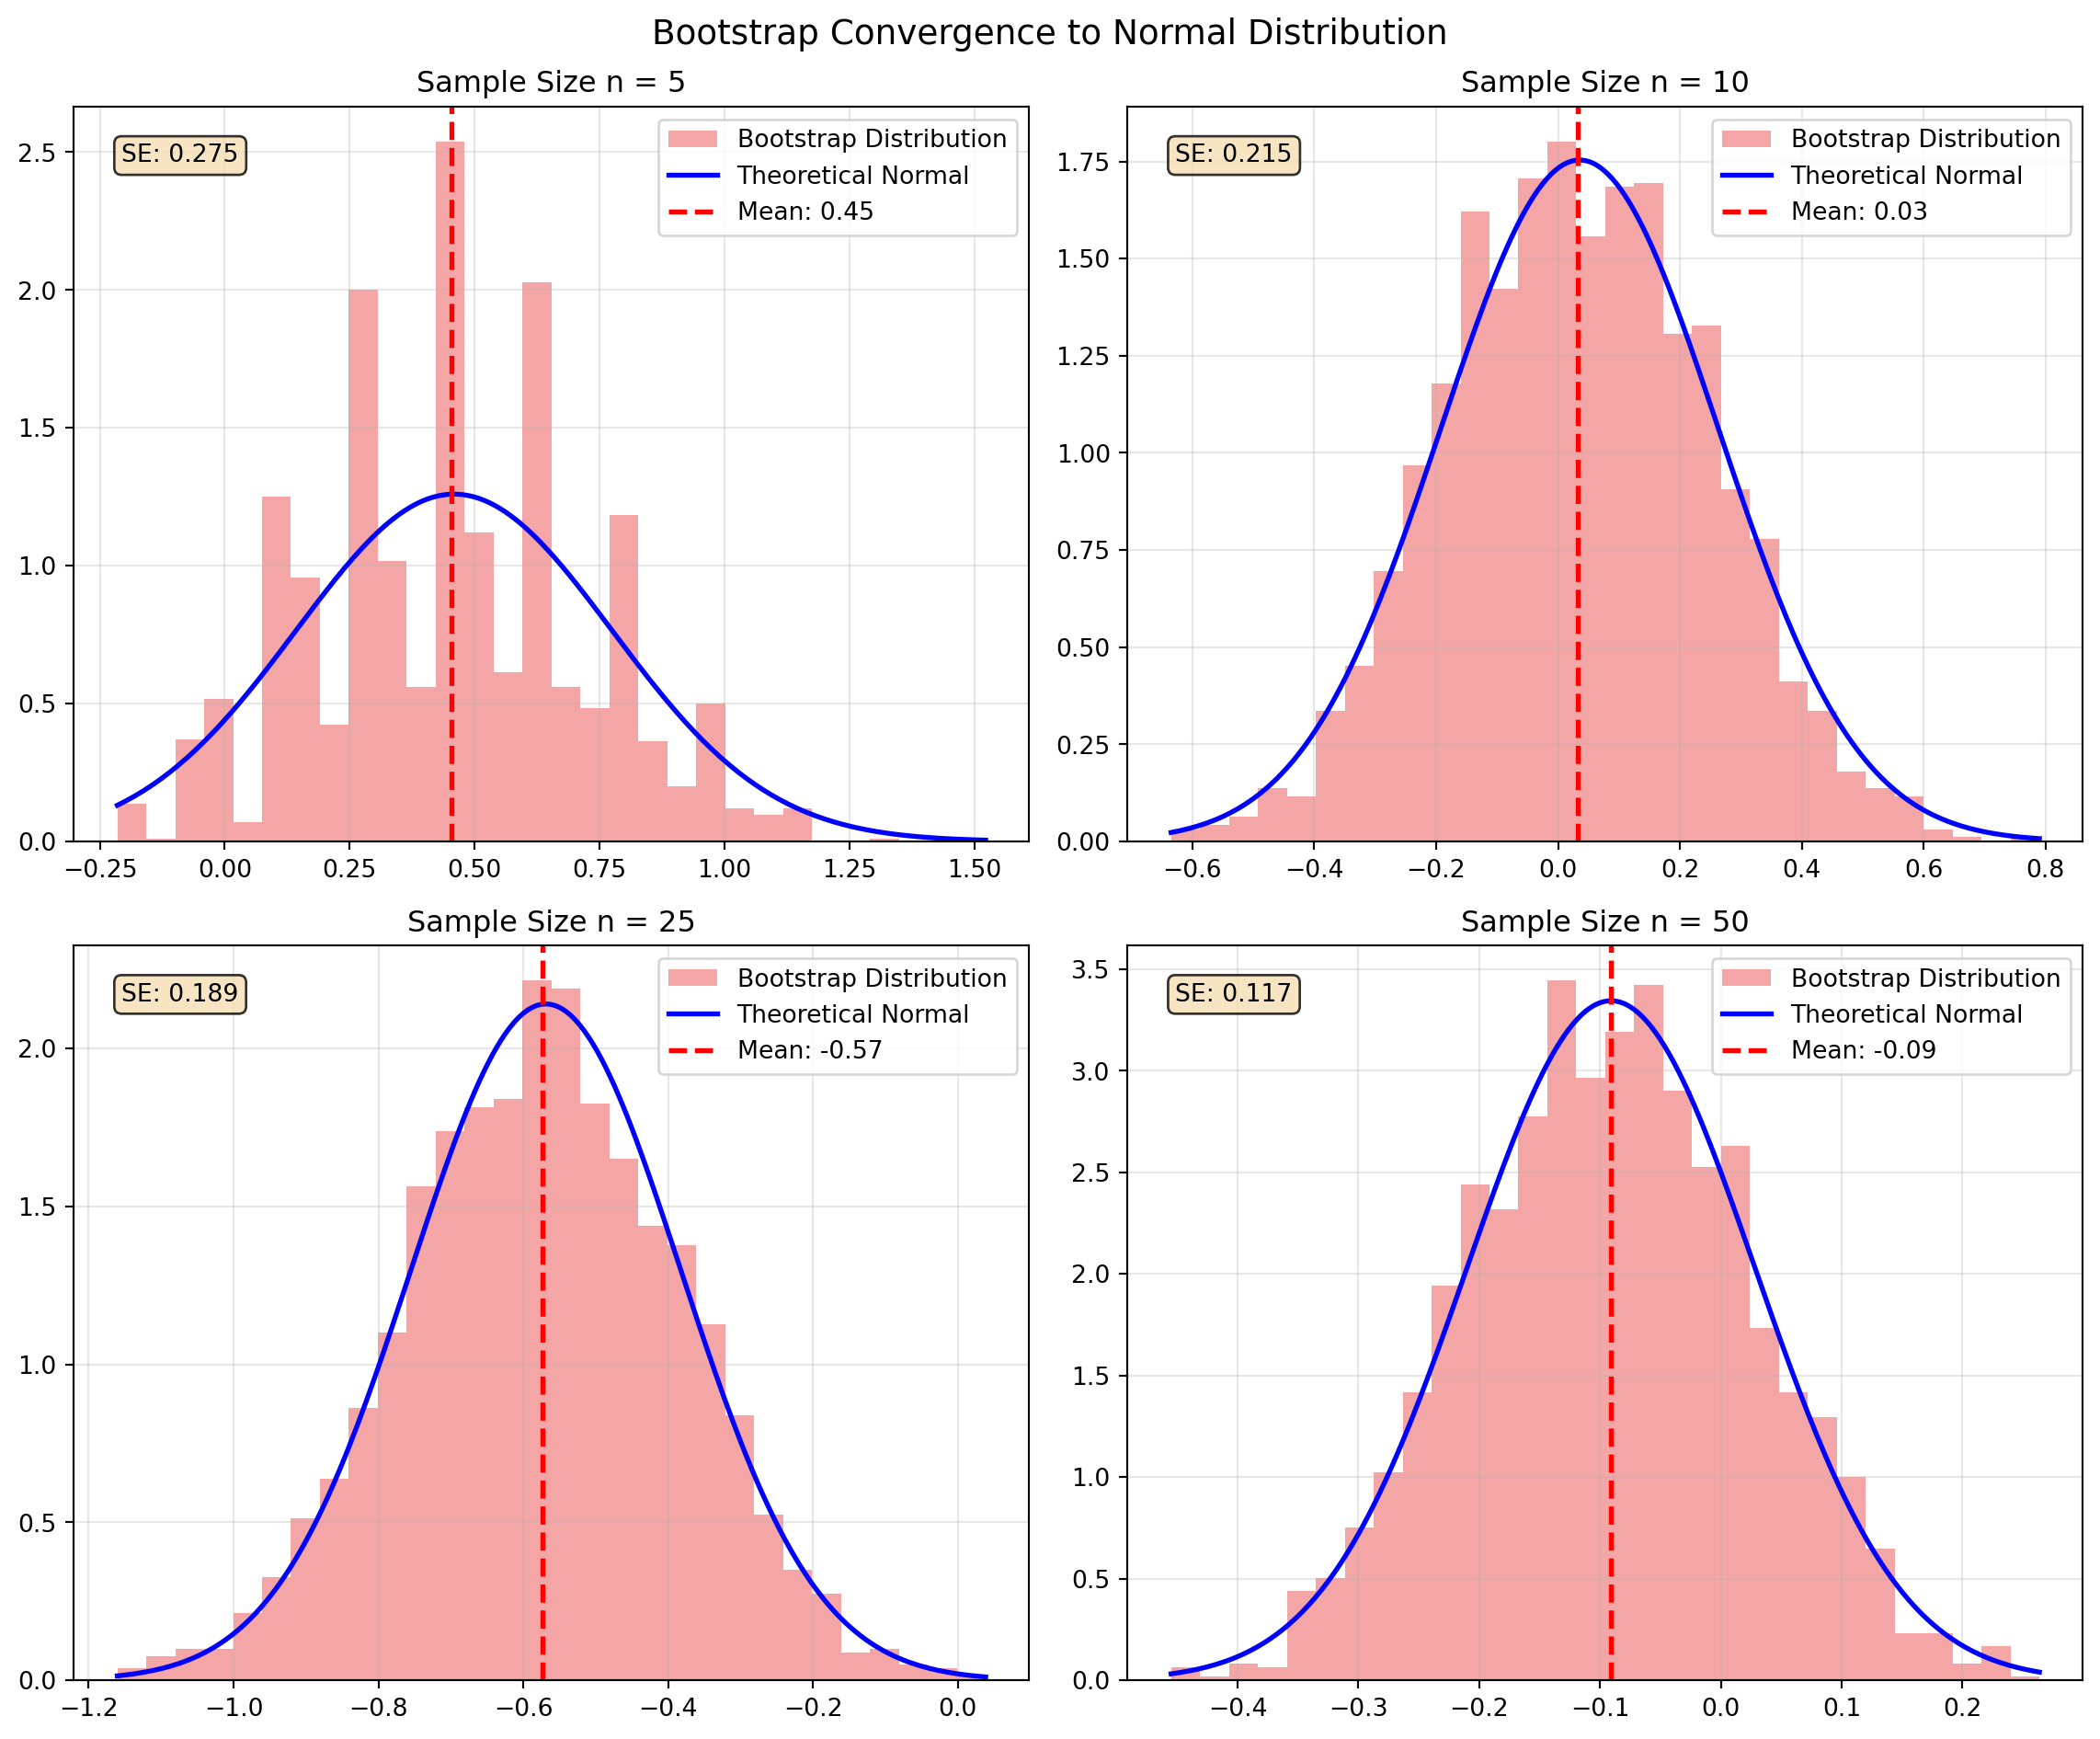

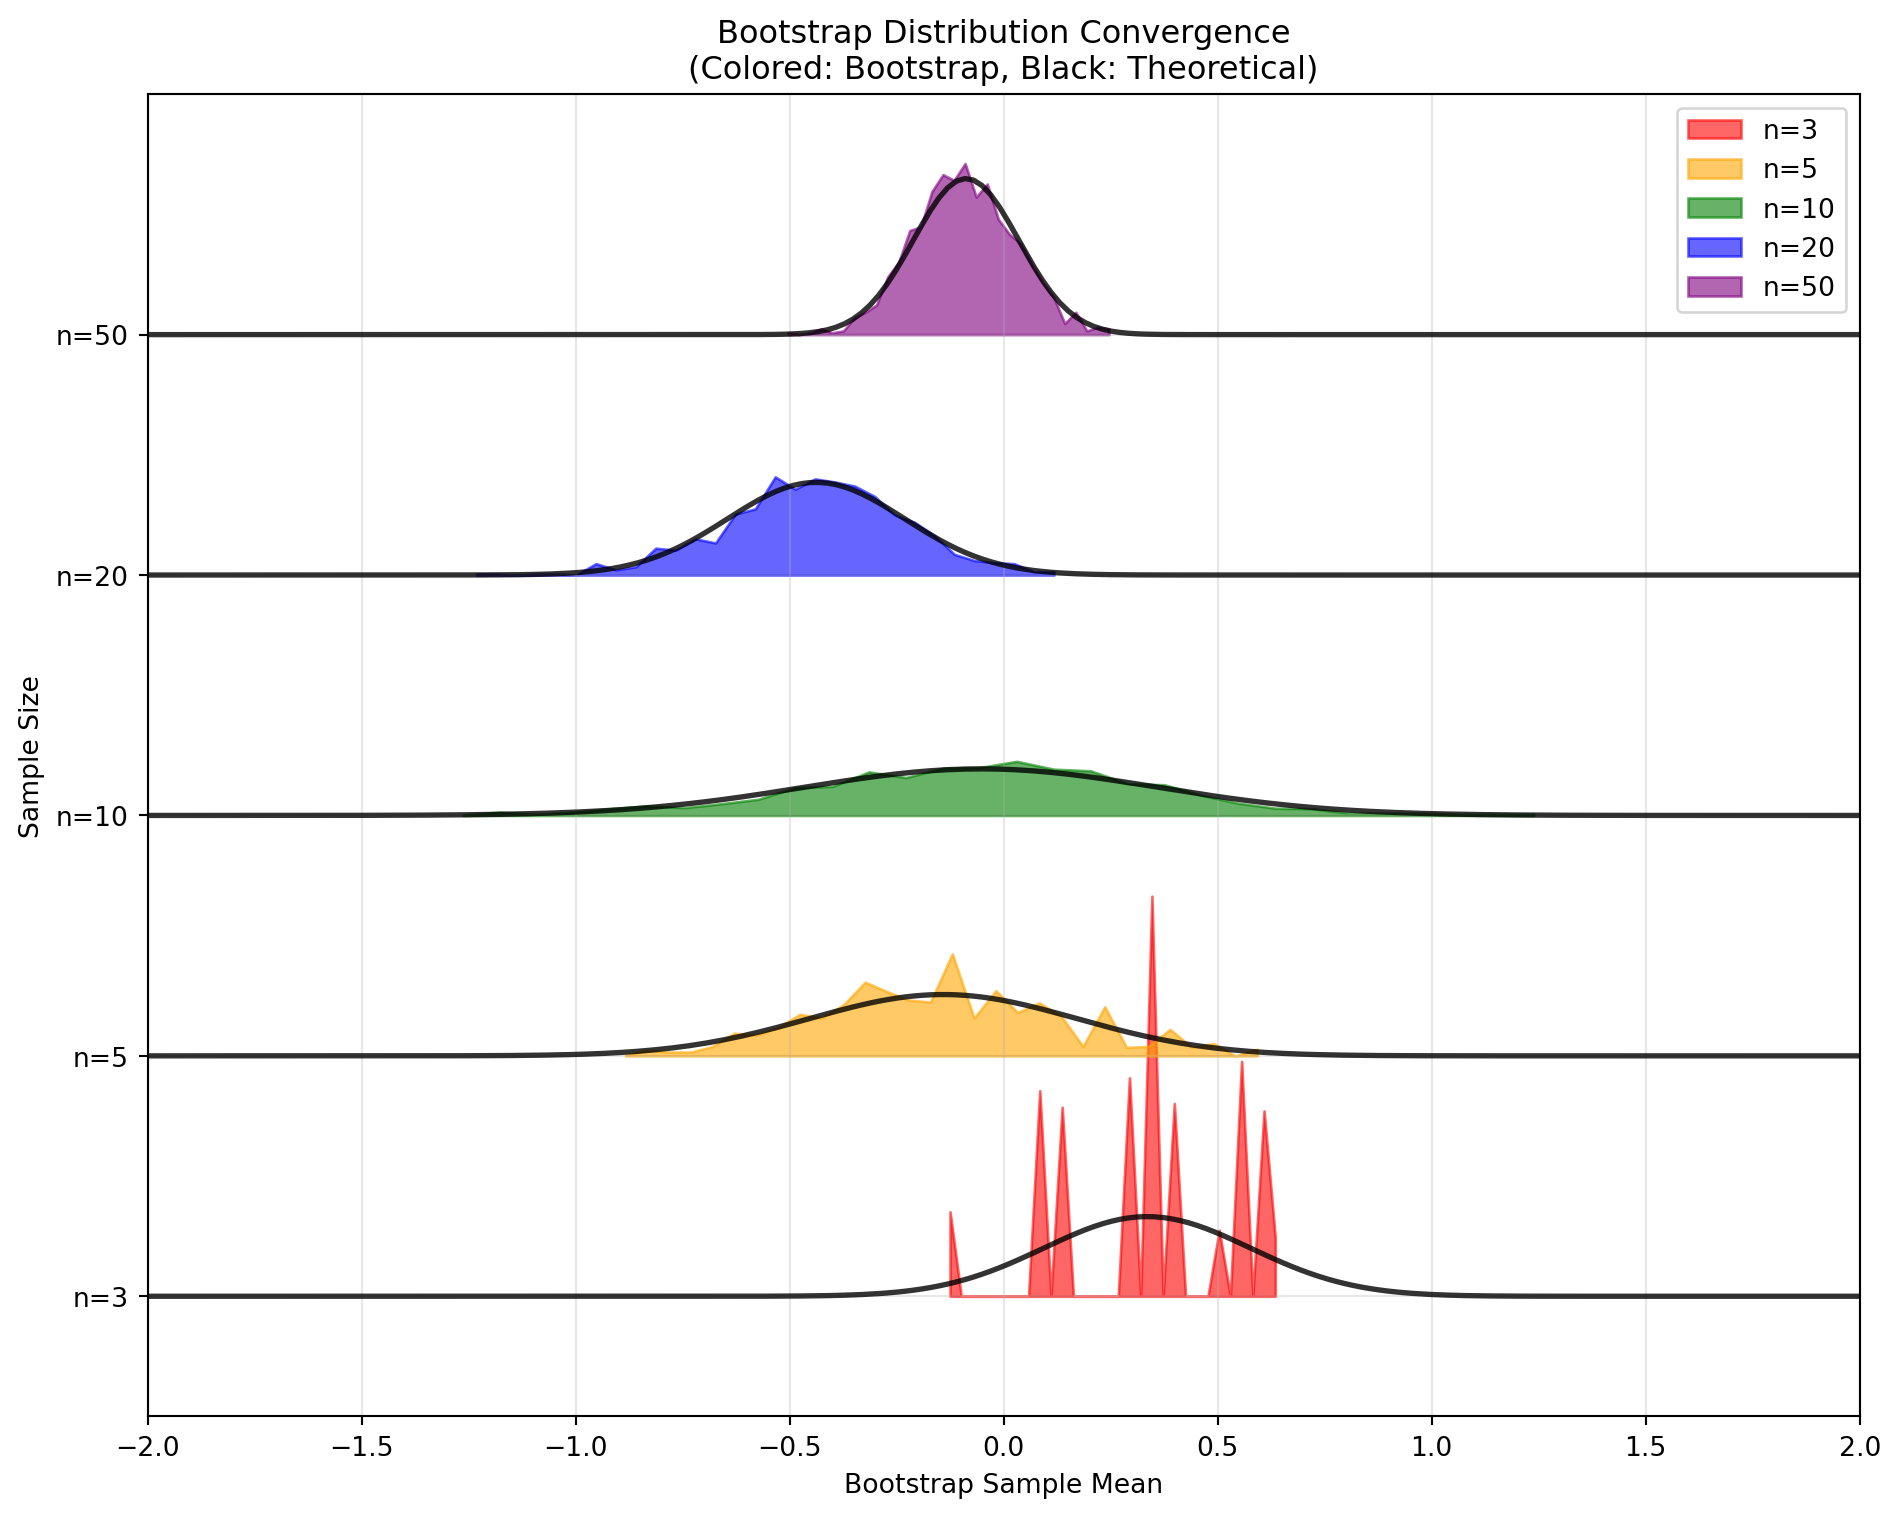

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

true_mean, true_std = 0, 1
true_dist = stats.norm(true_mean, true_std)

def bootstrap_means(sample, n_bootstrap=1000):
    """Bootstrap the sample mean"""
    bootstrap_means = []
    n = len(sample)
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    return np.array(bootstrap_means)

sample_sizes = [5, 10, 25, 50]
n_bootstrap = 2000

# First figure: Original samples vs Bootstrap distributions (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Bootstrap Convergence to Normal Distribution', fontsize=14)

x_range = np.linspace(-4, 4, 1000)
true_pdf = true_dist.pdf(x_range)

for i, n in enumerate(sample_sizes):
    row = i // 2
    col = i % 2
    
    sample = np.random.normal(true_mean, true_std, n)
    boot_means = bootstrap_means(sample, n_bootstrap)
    
    # Bootstrap distributions
    axes[row, col].hist(boot_means, bins=30, alpha=0.7, color='lightcoral', 
                       density=True, label='Bootstrap Distribution')
    
    theoretical_mean = np.mean(sample)
    theoretical_std = np.std(sample, ddof=1) / np.sqrt(n)
    theoretical_x = np.linspace(boot_means.min(), boot_means.max(), 200)
    theoretical_pdf = stats.norm.pdf(theoretical_x, theoretical_mean, theoretical_std)
    axes[row, col].plot(theoretical_x, theoretical_pdf, 'b-', linewidth=2, 
                       label='Theoretical Normal')
    
    axes[row, col].axvline(np.mean(boot_means), color='red', linestyle='--', 
                          linewidth=2, label=f'Mean: {np.mean(boot_means):.2f}')
    
    axes[row, col].set_title(f'Sample Size n = {n}')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    
    boot_std = np.std(boot_means)
    axes[row, col].text(0.05, 0.95, f'SE: {boot_std:.3f}', 
                       transform=axes[row, col].transAxes, fontsize=10, 
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Second figure: Convergence comparison
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

sample_sizes_detailed = [3, 5, 10, 20, 50]
colors = ['red', 'orange', 'green', 'blue', 'purple']

x_min, x_max = -2, 2
y_positions = np.arange(len(sample_sizes_detailed))

for i, (n, color) in enumerate(zip(sample_sizes_detailed, colors)):
    np.random.seed(42 + i)
    sample = np.random.normal(true_mean, true_std, n)
    boot_means = bootstrap_means(sample, 1000)
    
    hist_counts, hist_bins = np.histogram(boot_means, bins=30, density=True)
    hist_centers = (hist_bins[:-1] + hist_bins[1:]) / 2
    hist_heights = hist_counts * 0.2
    
    y_base = i
    ax.fill_between(hist_centers, y_base, y_base + hist_heights, 
                    alpha=0.6, color=color, label=f'n={n}')
    
    sample_mean = np.mean(sample)
    sample_se = np.std(sample, ddof=1) / np.sqrt(n)
    x_theory = np.linspace(x_min, x_max, 200)
    y_theory = stats.norm.pdf(x_theory, sample_mean, sample_se)
    y_theory_scaled = y_theory * 0.2
    
    ax.plot(x_theory, y_base + y_theory_scaled, 'k-', linewidth=2, alpha=0.8)

ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.5, len(sample_sizes_detailed))
ax.set_xlabel('Bootstrap Sample Mean')
ax.set_ylabel('Sample Size')
ax.set_yticks(y_positions)
ax.set_yticklabels([f'n={n}' for n in sample_sizes_detailed])
ax.set_title('Bootstrap Distribution Convergence\n(Colored: Bootstrap, Black: Theoretical)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

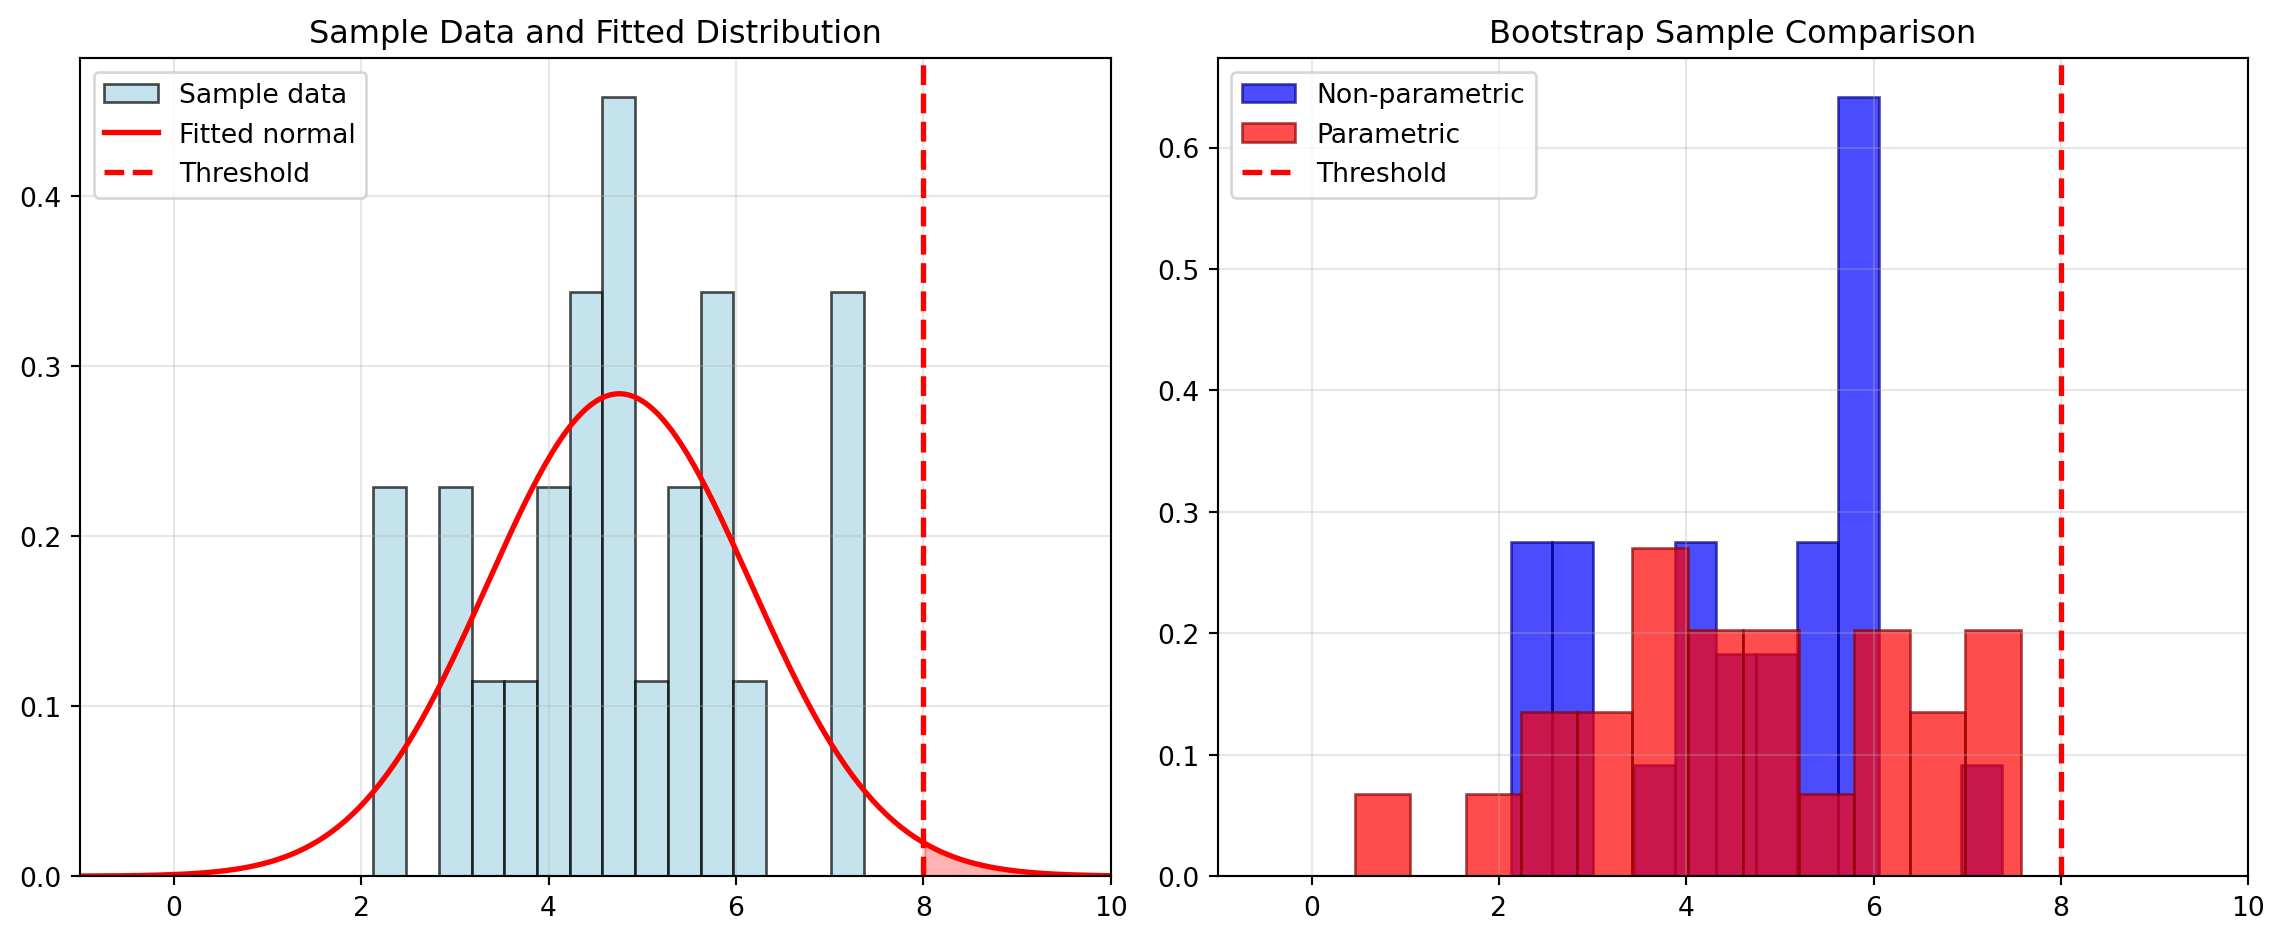

True P(X > 8): 0.0228
Non-parametric estimate: 0.0000 (bias: 0.0228)
Parametric estimate: 0.0104 (bias: 0.0124)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

def bootstrap_statistic_nonparametric(data, statistic_func, n_bootstrap=1000):
    """Non-parametric bootstrap"""
    bootstrap_stats = []
    n = len(data)
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_stats.append(statistic_func(bootstrap_sample))
    return np.array(bootstrap_stats)

def bootstrap_statistic_parametric(data, distribution, statistic_func, n_bootstrap=1000):
    """Parametric bootstrap"""
    params = distribution.fit(data)
    n = len(data)
    
    bootstrap_stats = []
    for _ in range(n_bootstrap):
        bootstrap_sample = distribution.rvs(*params, size=n)
        bootstrap_stats.append(statistic_func(bootstrap_sample))
    return np.array(bootstrap_stats)

def probability_above_threshold(x, threshold=8):
    """Estimate P(X > threshold)"""
    return np.mean(x > threshold)

# Generate sample from normal distribution
n_samples = 25
true_mu, true_sigma = 5, 1.5
n_bootstrap = 2000

normal_data = np.random.normal(loc=true_mu, scale=true_sigma, size=n_samples)
true_prob = 1 - stats.norm.cdf(8, loc=true_mu, scale=true_sigma)

# Bootstrap estimates
nonparam_probs = bootstrap_statistic_nonparametric(normal_data, 
                                                  lambda x: probability_above_threshold(x, 8), 
                                                  n_bootstrap)
param_probs = bootstrap_statistic_parametric(normal_data, stats.norm, 
                                            lambda x: probability_above_threshold(x, 8), 
                                            n_bootstrap)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Sample data and fitted distribution
axes[0].hist(normal_data, bins=15, alpha=0.7, color='lightblue', 
             density=True, edgecolor='black', label='Sample data')

mu_hat, sigma_hat = stats.norm.fit(normal_data)
x_range = np.linspace(-1, 10, 300)
fitted_curve = stats.norm.pdf(x_range, mu_hat, sigma_hat)

axes[0].plot(x_range, fitted_curve, 'r-', linewidth=2, label='Fitted normal')
axes[0].axvline(8, color='red', linestyle='--', linewidth=2, label='Threshold')
axes[0].fill_between(x_range[x_range > 8], fitted_curve[x_range > 8], 
                    alpha=0.3, color='red')
axes[0].set_title('Sample Data and Fitted Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-1, 10)

# Right: Bootstrap sample comparison
np.random.seed(123)
nonparam_sample = np.random.choice(normal_data, size=n_samples, replace=True)
param_sample = stats.norm.rvs(mu_hat, sigma_hat, size=n_samples)

axes[1].hist(nonparam_sample, bins=12, alpha=0.7, color='blue', 
             density=True, label='Non-parametric', edgecolor='darkblue')
axes[1].hist(param_sample, bins=12, alpha=0.7, color='red', 
             density=True, label='Parametric', edgecolor='darkred')
axes[1].axvline(8, color='red', linestyle='--', linewidth=2, label='Threshold')
axes[1].set_title('Bootstrap Sample Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-1, 10)

plt.tight_layout()
plt.show()

# Results
nonparam_mean = np.mean(nonparam_probs)
param_mean = np.mean(param_probs)
nonparam_bias = abs(nonparam_mean - true_prob)
param_bias = abs(param_mean - true_prob)

print(f"True P(X > 8): {true_prob:.4f}")
print(f"Non-parametric estimate: {nonparam_mean:.4f} (bias: {nonparam_bias:.4f})")
print(f"Parametric estimate: {param_mean:.4f} (bias: {param_bias:.4f})")